In [ ]:
from google.colab import drive
drive.mount('/iCloudDrive/AI-IITKGP')

ValueError: Mountpoint must be in a directory that exists

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install transformers        # The transformers module, developed by Hugging Face, is a powerful library for natural language processing (NLP) and other machine learning tasks. It provides a wide range of pre-trained models and tools to easily implement state-of-the-art machine learning models.
!pip install torch               # The torch module is a core component of the PyTorch library, which is widely used for building and training neural networks.
!pip install pandas              # The pandas module is a powerful and versatile library for data analysis and manipulation in Python

In [4]:
from transformers import pipeline                        # A pipeline in Hugging Face Transformers is a simplified API that abstracts complex code, enabling easy use of models for tasks like sentiment analysis, named entity recognition, and text generation

# Load pre-trained sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")      # The pipeline("sentiment-analysis") in Hugging Face Transformers is a simple API that uses pre-trained models to classify text as positive, negative, or neutral. It abstracts complex code, making sentiment analysis accessible with minimal effort

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
# import pandas as pd

# # Sample feedback data
# data = {
#     "Employee": ["Amit", "Shamik", "Prasenjit", "Avijit", "Manirul", "Somsubhra", "Subhabrata"],
#     "Feedback": [
#         "I love the new project management tool!",
#         "The recent changes in the workflow are confusing.",
#         "Great team collaboration on the last project.",
#         "I'm not happy with the current work environment.",
#         "I need a promotion",
#         "Need onsite role. Waiting for a long time for it.",
#         "Happy with this role and got promoted"
#     ]
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

In [6]:
import pandas as pd
# Read Excel file
df = pd.read_excel("/content/Employee Feedback.xlsx")


In [7]:
def analyze_sentiment(feedback):
    result = sentiment_analysis(feedback)[0]
    return result['label'], result['score']

# Apply sentiment analysis to the 'Feedback on work environment' column
df['Sentiment'], df['Confidence'] = zip(*df['Feedback'].apply(analyze_sentiment))

# Display the results with Name, Feedback, Sentiment, and Confidence
print(df[['Name', 'Feedback', 'Sentiment', 'Confidence']])

df.to_csv("processed_feedback.csv", index=False)

         Name                                           Feedback Sentiment  \
0        Amit            I love the new project management tool!  POSITIVE   
1  Subhabrata  The recent changes in the workflow are confusing.  NEGATIVE   
2   Somsubhra      Great team collaboration on the last project.  POSITIVE   
3     Manirul   I'm not happy with the current work environment.  NEGATIVE   
4      Avijit                                 I need a promotion  NEGATIVE   
5   Prasenjit  Need onsite role. Waiting for a long time for it.  NEGATIVE   
6      Shamik              Happy with this role and got promoted  POSITIVE   

   Confidence  
0    0.999843  
1    0.999406  
2    0.999871  
3    0.999772  
4    0.997436  
5    0.997548  
6    0.999822  


In [8]:
# Calculate the percentage of each sentiment type
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Determine overall sentiment
if sentiment_counts.get('POSITIVE', 0) > 70:
    overall_sentiment = "Overall Sentiment: Positive"
elif sentiment_counts.get('NEGATIVE', 0) > 70:
    overall_sentiment = "Overall Sentiment: Negative"
else:
    overall_sentiment = "Overall Sentiment: Mixed Sentiment"

# Display the result
print(overall_sentiment)

# Optional: Display percentages for clarity
print(f"Positive Sentiment: {sentiment_counts.get('POSITIVE', 0):.2f}%")
print(f"Negative Sentiment: {sentiment_counts.get('NEGATIVE', 0):.2f}%")
print(f"Neutral Sentiment: {sentiment_counts.get('NEUTRAL', 0):.2f}%")


Overall Sentiment: Mixed Sentiment
Positive Sentiment: 42.86%
Negative Sentiment: 57.14%
Neutral Sentiment: 0.00%


<ipython-input-9-563a865b65e2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sentiment_plot = sns.countplot(data=df, x='Sentiment', palette='Set2')


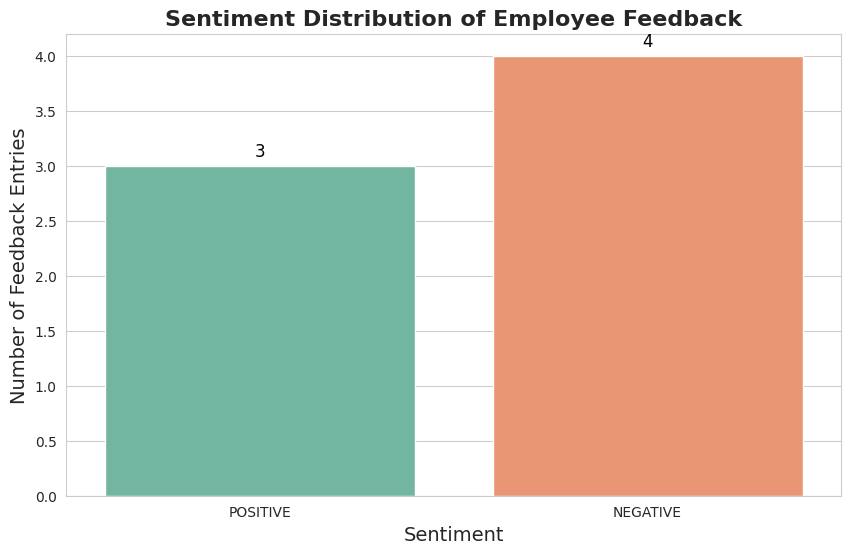

<ipython-input-9-563a865b65e2>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Confidence', palette='Set3')


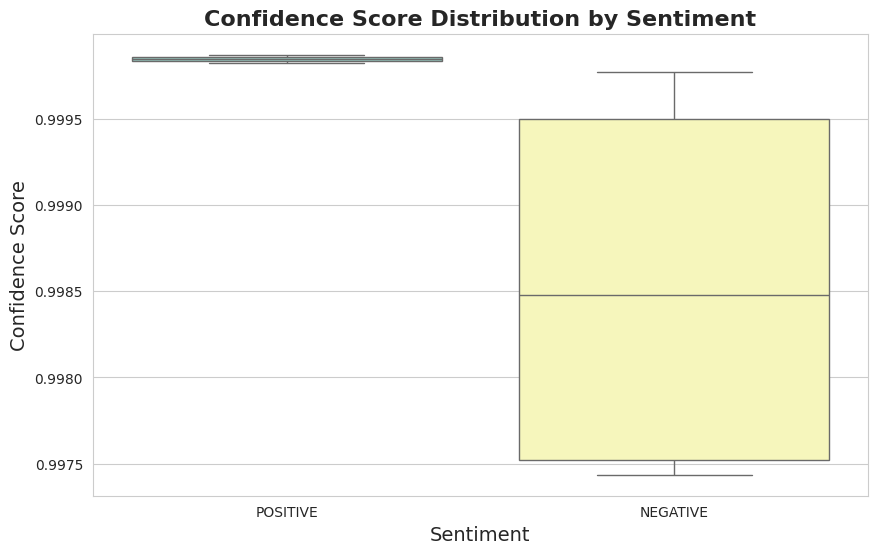

<ipython-input-9-563a865b65e2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Confidence', palette='Set3', showfliers=False)  # Box plot without outliers


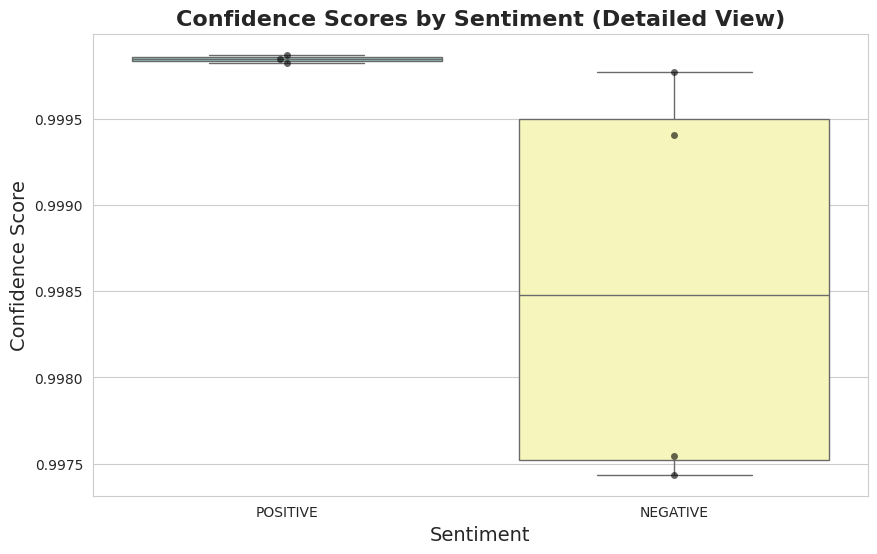

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for better aesthetics
sns.set_style("whitegrid")

# 1. Count Plot with Annotations
plt.figure(figsize=(10, 6))
sentiment_plot = sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution of Employee Feedback', fontsize=16, weight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Feedback Entries', fontsize=14)

# Add annotations on bars
for p in sentiment_plot.patches:
    sentiment_plot.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                            textcoords='offset points')
plt.show()

# 2. Box Plot for Confidence Scores by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Confidence', palette='Set3')
plt.title('Confidence Score Distribution by Sentiment', fontsize=16, weight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Confidence Score', fontsize=14)
plt.show()

# 3. Box Plot with Swarm Plot Overlay for Confidence Scores by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Confidence', palette='Set3', showfliers=False)  # Box plot without outliers
sns.swarmplot(data=df, x='Sentiment', y='Confidence', color='k', alpha=0.6)            # Overlay swarm plot
plt.title('Confidence Scores by Sentiment (Detailed View)', fontsize=16, weight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Confidence Score', fontsize=14)
plt.show()


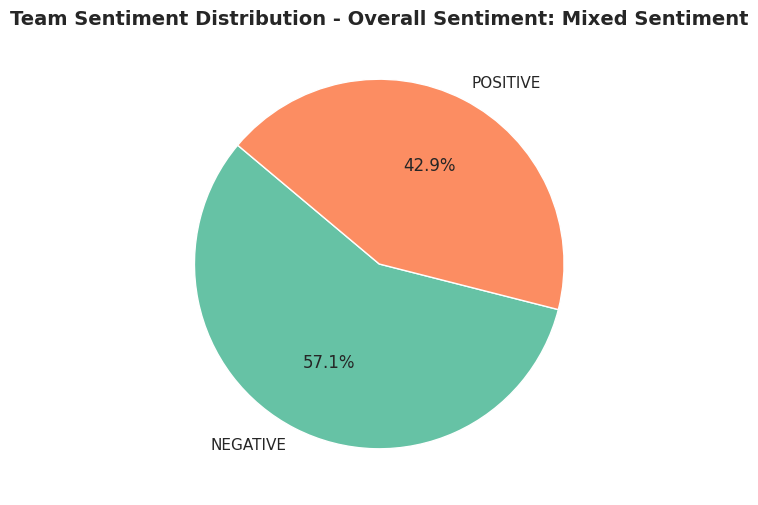

<ipython-input-21-d6cbc4ade55f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#66c2a5', '#fc8d62', '#8da0cb'])
<ipython-input-21-d6cbc4ade55f>:22: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#66c2a5', '#fc8d62', '#8da0cb'])


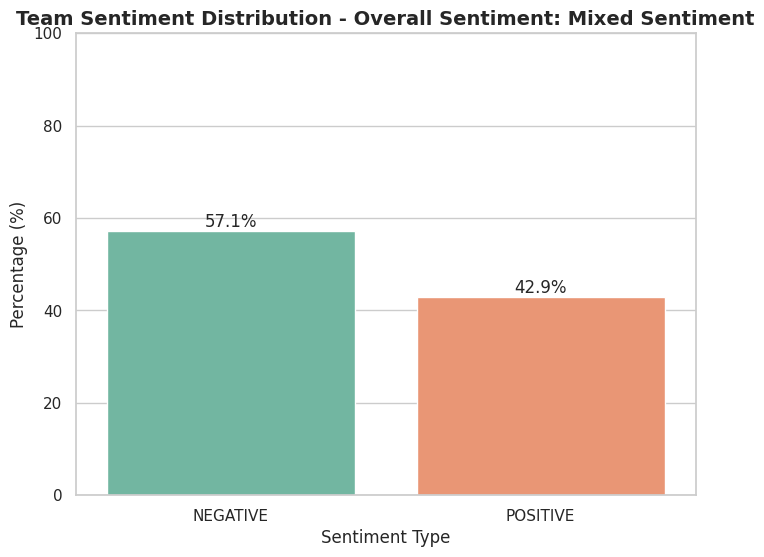

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of each sentiment type
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Determine overall sentiment label based on the criteria
if sentiment_counts.get('POSITIVE', 0) > 70:
    overall_sentiment = "Positive"
elif sentiment_counts.get('NEGATIVE', 0) > 70:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Mixed Sentiment"

# 1. Pie Chart to show sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title(f"Team Sentiment Distribution - Overall Sentiment: {overall_sentiment}", fontsize=14, weight='bold')
plt.show()

# 2. Bar Chart to show sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title(f"Team Sentiment Distribution - Overall Sentiment: {overall_sentiment}", fontsize=14, weight='bold')
plt.xlabel("Sentiment Type")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

# Annotate each bar with the percentage value
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.show()
